In [27]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [12]:
df = pd.read_csv('../drinking_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [28]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [29]:
# Separar las variables independientes y dependientes
X = df.drop('Potability', axis=1)
y = df['Potability']

In [30]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': make_pipeline(StandardScaler(), SVC()),
    'K-NN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB()
}

In [33]:
# Train and evaluate each model
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

In [34]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {metric_name: metric_function(y_test, y_pred) for metric_name, metric_function in evaluation_metrics.items()}

In [35]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

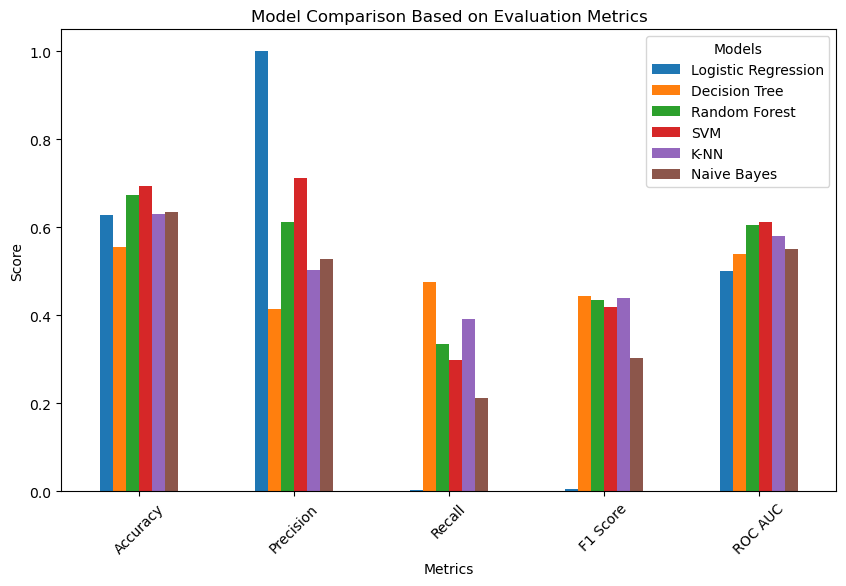

In [36]:
# Plot results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison Based on Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.show()

In [37]:
print(results_df)

           Logistic Regression  Decision Tree  Random Forest       SVM  \
Accuracy              0.628688       0.555443       0.673449  0.693795   
Precision             1.000000       0.415274       0.611940  0.712418   
Recall                0.002732       0.475410       0.336066  0.297814   
F1 Score              0.005450       0.443312       0.433862  0.420039   
ROC AUC               0.501366       0.539164       0.604824  0.613251   

               K-NN  Naive Bayes  
Accuracy   0.629705     0.635809  
Precision  0.503521     0.527027  
Recall     0.390710     0.213115  
F1 Score   0.440000     0.303502  
ROC AUC    0.581093     0.549831  


In [38]:
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

In [39]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

In [40]:
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

In [41]:
print(f"Best Model: {best_model}")
print(f"Accuracy: {best_accuracy}")

Best Model: SVM
Accuracy: 0.6937945066124109
